In [356]:
import pandas as pd
import sys
import codecs
import json
import random
import re
import glob
import math
from collections import Counter
import torch
import numpy as np
import pickle
from nltk import Tree
import spacy
import numpy as np
import matplotlib.pyplot as plt

from nltk import Tree
import spacy
import numpy as np
from nltk.draw.tree import TreeView

In [357]:
# get the average depth for the binary tree
def average_depth(parse):
    depths = []
    current_depth = 0
    for token in parse.split():
        if token == '(':
            current_depth += 1
        elif token == ')':
            current_depth -= 1
        else:
            depths.append(current_depth)
    if len(depths) == 0:
        pass
    else:
        return float(sum(depths)) / len(depths)

    
def sente_parsetokenize(parse):
    parse = spaceify(parse)
    return [token for token in parse.split() if token not in ['(', ')']]

def get_tree(file_path):
    pres_list = []
    with open(file_path,'r') as f:
        for line in f:
            pres_list.append(line)
    
    pres_list = [pres_list[i].strip('\n') for i in range(len(pres_list))]
    pres_list = [spaceify(tree) for tree in pres_list]
    return pres_list

In [358]:
# get the gold standard binary parsing tree
gold = []
with open('binary_result/gold.txt','r') as f:
    for line in f:
        gold.append(line)
gold = [gold[i].strip('\n') for i in range(len(gold))]
gold = [spaceify(tree) for tree in gold]

In [359]:
# creat a dataframe for all the URNNG trees
trees = pd.DataFrame()
seed_list = ['1000','1010','1234','1818','2019','2345','2828','3434','3435','9292']
for seed in seed_list:
    path = 'binary_result/urnng_'+seed+'.txt'
    pred_list= get_tree(path)
    trees[seed] = pred_list

In [384]:
# get left banching and right branching trees for each sentence 
lb_trees = []
rb_trees = []
for tree in gold:
    tokens = sente_parsetokenize(tree)
    left_branch = to_string(tokens_to_lb(tokens))
    right_branch = to_string(tokens_to_rb(tokens))
    lb_trees.append(left_branch)
    rb_trees.append(right_branch)

In [385]:
trees['gold'] = gold
trees['left_branching_tree'] = lb_trees
trees['right_branching_tree'] = rb_trees

In [408]:
trees.to_csv('trees.csv',index = False)

In [387]:
trees = pd.read_csv('trees.csv')

In [20]:
gold = []
with open('binary_result/gold.txt','r') as f:
    for line in f:
        gold.append(line)
gold = [gold[i].strip('\n') for i in range(len(gold))]
gold = [spaceify(tree) for tree in gold]

In [381]:
# statistics for depth 
gold_dep = [average_depth(tree) for tree in gold ]
pred_dep = [average_depth(tree) for tree in pred_1010 ]

In [21]:
# get number of unique binary trees 
unique_num = [len(set(trees.iloc[i,:10])) for i in range(len(trees))]
trees['unique_num'] = unique_num

In [31]:
sent_len = [len(sente_parsetokenize(tree)) for tree in gold]

In [37]:
# plot the number of unique trees vs sentence length 
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

In [320]:
len_group = []
for i in range(len(sent_len)):
    if sent_len[i] < 10:
        len_group.append('0~10')
    elif sent_len[i] < 20:
        len_group.append('10~19')
    elif sent_len[i] < 30:
        len_group.append('20~29')
    elif sent_len[i] < 40:
        len_group.append('30~39')
    elif sent_len[i] < 50:
        len_group.append('40~49')
    else:
        len_group.append('50+')

In [321]:
# get std for each row 
dep_std_list = []
dep_mean_list = []
dep_list = []
for i in range(len(trees)):
    row_trees = list(trees.iloc[i,:10])
    depths = [average_depth(tree) for tree in row_trees]
    dep_std = np.std(depths)
    dep_mean = np.mean(depths)
    dep_std_list.append(dep_std)
    dep_mean_list.append(dep_mean)

In [322]:
dep_data = []
dep_data = pd.DataFrame(sent_len, columns = ['sentence_length'])
dep_data['length_group'] = len_group
dep_data['dep_mean'] = dep_mean_list
dep_data['dep_std'] = dep_std_list

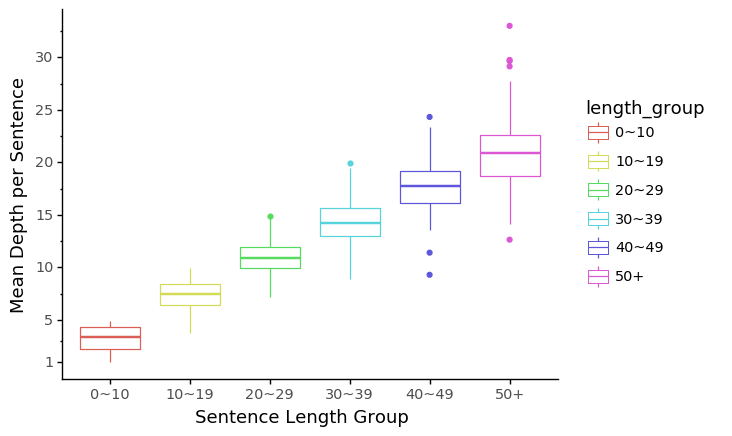

<ggplot: (7572967693)>

In [327]:
(
ggplot(data = dep_data) + 
    geom_boxplot(aes(x = 'length_group', y = 'dep_mean', color = 'length_group'))+
    scale_y_continuous(breaks=[1,5,10,15,20,25,30,35,40],
                       labels=['1','5','10','15','20','25','30','35','40'])+
    theme_classic(base_size =13) +
    xlab("Sentence Length Group") + 
    ylab("Mean Depth per Sentence ") +
    theme_classic(base_size =13)
)

In [328]:
# save the plot as pdf 
(
ggsave(filename="dep_plot_1.pdf",
       plot= ggplot(data = dep_data) + 
    geom_boxplot(aes(x = 'length_group', y = 'dep_mean', color = 'length_group'))+
    scale_y_continuous(breaks=[1,5,10,15,20,25,30,35,40],
                       labels=['1','5','10','15','20','25','30','35','40'])+
    theme_classic(base_size =13) +
    xlab("Sentence Length Group") + 
    ylab("Mean Depth per Sentence ") +
    theme_classic(base_size =20) ,
       
       device='png',
       dpi=300,
       height=8,
       width=10)
)

/Users/bckou/anaconda3/envs/nlp/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/bckou/anaconda3/envs/nlp/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: dep_plot_1.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [390]:
num_data = pd.DataFrame(sent_len, columns = ['sentence_length'])
num_data['#Trees'] = [str(i) for i in unique_num]
num_data['unique_num'] = [int(i) for i in unique_num]
num_data['length_group'] = len_group

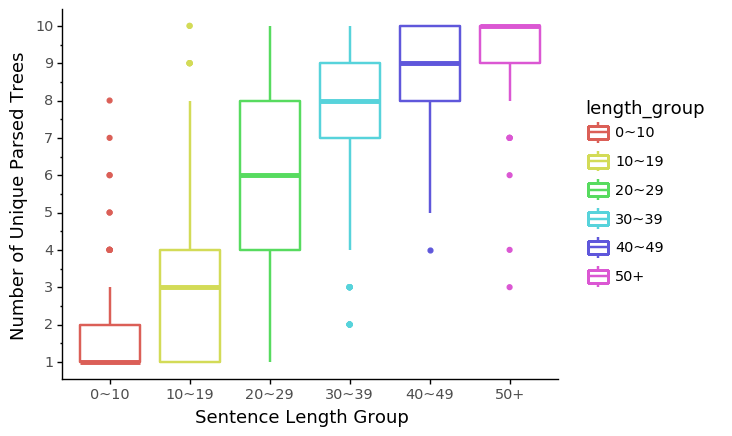

<ggplot: (7571843757)>

In [391]:
(
ggplot(num_data, aes(x = 'length_group', y = 'unique_num',color = 'length_group')) +
       geom_boxplot(size=1) +
       scale_y_continuous(breaks=[1,2,3,4,5,6,7,8,9,10],
                       labels=['1','2','3','4','5','6','7','8','9','10'])+
       xlab("Sentence Length Group") + 
       ylab("Number of Unique Parsed Trees ") +
       theme_classic(base_size =13)
)

In [340]:
# save the plot as pdf 
(
ggsave(filename="num_plot_2.pdf",
       plot= ggplot(num_data, aes(x = 'length_group', y = 'unique_num',color = 'length_group')) +
       geom_boxplot(size=1) +
       scale_y_continuous(breaks=[1,2,3,4,5,6,7,8,9,10],
                       labels=['1','2','3','4','5','6','7','8','9','10'])+
       xlab("Sentence Length Group") + 
       ylab("Number of Unique Parsed Trees ") +
       theme_classic(base_size =20) ,
       
       device='png',
       dpi=300,
       height=8,
       width=10)
)

/Users/bckou/anaconda3/envs/nlp/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/bckou/anaconda3/envs/nlp/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: num_plot_2.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


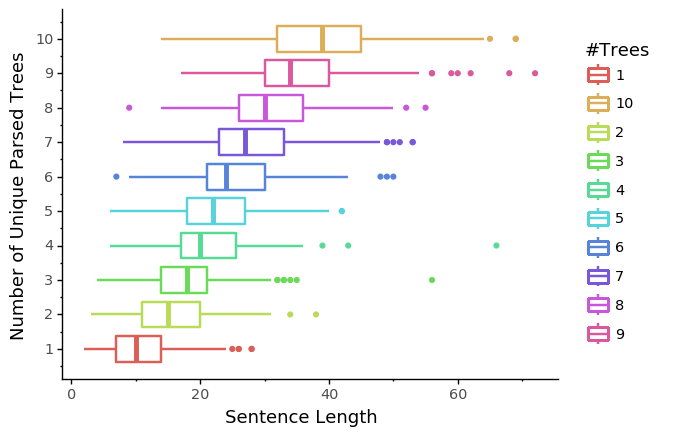

<ggplot: (7572251997)>

In [392]:
(
ggplot(num_data, aes(y = 'sentence_length', x = 'unique_num', color = '#Trees')) +
       geom_boxplot(size=1) +
       scale_x_continuous(breaks=[1,2,3,4,5,6,7,8,9,10],
                       labels=['1','2','3','4','5','6','7','8','9','10'])+
       coord_flip()+
       ylab("Sentence Length") + 
       xlab("Number of Unique Parsed Trees ") +
       theme_classic(base_size =13) # for pdf 20, 10, 8, 
)

In [238]:
# save the plot as pdf 
(
ggsave(filename="num_plot.pdf",
       plot= ggplot(num_data, aes(y = 'sentence_length', x = 'unique_num', color = '#Trees')) +
       geom_boxplot(size=1) +
       scale_x_continuous(breaks=[1,2,3,4,5,6,7,8,9,10],
                       labels=['1','2','3','4','5','6','7','8','9','10'])+
       coord_flip()+
       ylab("Sentence Length") + 
       xlab("Number of Unique Parsed Trees ") +
       theme_classic(base_size =20) ,
       
       device='png',
       dpi=300,
       height=8,
       width=10)
)

/Users/bckou/anaconda3/envs/nlp/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/bckou/anaconda3/envs/nlp/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: num_plot.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [345]:
total_self = pd.read_csv('total_self_f1.csv')
total_self['gold_str'] = [str(s) for s in total_self.gold ]

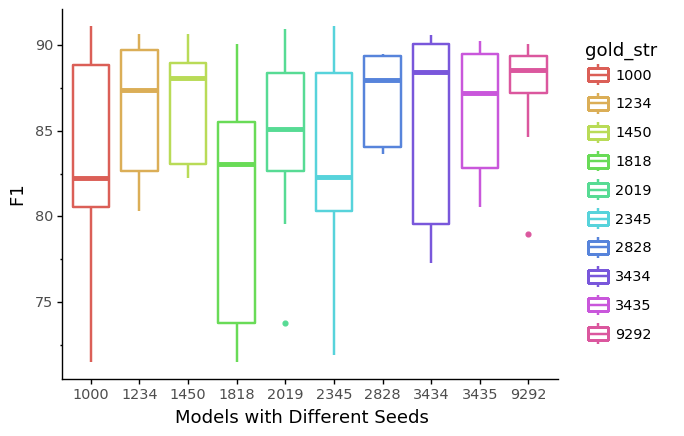

<ggplot: (7571711421)>

In [347]:
(
ggplot(total_self, aes(x = 'gold_str', y = 'f1', color = 'gold_str')) +
       geom_boxplot(size=1) +
       #scale_x_continuous(breaks=[1,2,3,4,5,6,7,8,9,10],
        #               labels=['1','2','3','4','5','6','7','8','9','10'])+
       xlab("Models with Different Seeds") + 
       ylab("F1 ") +
       theme_classic(base_size =13) # for pdf 20, 10, 8, 
)

In [352]:
# save the plot as pdf 
(
ggsave(filename="self_f1_plot.pdf",
       plot= ggplot(total_self, aes(x = 'gold_str', y = 'f1', color = 'gold_str')) +
       geom_boxplot(size=1) +
       xlab("Models with Different Seeds") + 
       ylab("F1 ") +
       theme_classic(base_size =20) ,
       
       device='png',
       dpi=300,
       height=8,
       width=14)
)

/Users/bckou/anaconda3/envs/nlp/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 14 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/bckou/anaconda3/envs/nlp/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: self_f1_plot.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [416]:
mean_list = []
for seed in seed_list:
    mean_list.append(np.mean([average_depth(tree) for tree in trees[seed] ]))

In [418]:
# get depth of the tree 
dep_mean,dep_std,dep_max,dep_min = [],[],[],[]
for i in range(trees.shape[0]):
    dep_row = [average_depth(trees.iloc[i,j]) for j in range(len(seed_list))]
    dep_mean.append(np.mean(dep_row))
    dep_std.append(np.std(dep_row))
    dep_min.append(np.min(dep_row))
    dep_max.append(np.max(dep_row))

In [520]:
# get average corpus depth 
corpus_depth_mean = np.mean(dep_mean)

In [364]:
# required functions 
def spaceify(parse):
    return parse.replace("(", "( ").replace(")", " )")

In [365]:
def despaceify(parse):
    return parse.replace("( ","(",).replace(" )",")")

In [366]:
# get the average length for the binary tree
def average_length(parse):
    parse = spaceify(parse)
    return len(parse.split())

In [367]:
def sente_parsetokenize(parse):
    parse = spaceify(parse)
    return [token for token in parse.split() if token not in ['(', ')']]

In [368]:
def tokenize_parse(parse):
    parse = spaceify(parse)
    return [token for token in parse.split() if token not in ['(', ')']]


In [369]:
def full_transitions(N, left_full=False, right_full=False):
    """
    Recursively creates a full binary tree of with N
    leaves using shift reduce transitions.
    """

    if N == 1:
        return [0]

    if N == 2:
        return [0, 0, 1]

    assert not (left_full and right_full), "Please only choose one."

    if not left_full and not right_full:
        N = float(N)

        # Constrain to full binary trees.
        assert math.log(N, 2) % 1 == 0, \
            "Bad value. N={}".format(N)

        left_N = N / 2
        right_N = N - left_N

    if left_full:
        left_N = roundup2(N) / 2
        right_N = N - left_N

    if right_full:
        right_N = roundup2(N) / 2
        left_N = N - right_N

    return full_transitions(left_N, left_full=left_full, right_full=right_full) + \
           full_transitions(right_N, left_full=left_full, right_full=right_full) + \
           [1]

In [370]:
def tokens_to_rb(tree):
    if type(tree) is not list:
        return tree
    if len(tree) == 1:
        return tree[0]
    else:
        return [tree[0], tokens_to_rb(tree[1:])]

In [371]:
def tokens_to_lb(tree):
    if type(tree) is not list:
        return tree
    if len(tree) == 1:
        return tree[0]
    else:
        return [tokens_to_lb(tree[:-1]), tree[-1]]

In [38]:
def roundup2(N):
    """ Round up using factors of 2. """
    return int(2 ** math.ceil(math.log(N, 2)))

In [248]:
def to_string(parse):
    if type(parse) is not list:
        return parse
    if len(parse) == 1:
        return parse[0]
    else:
        return '( ' + to_string(parse[0]) + ' ' + to_string(parse[1]) + ' )'

In [376]:
def tokens_to_rb(tree):
    if type(tree) is not list:
        return tree
    if len(tree) == 1:
        return tree[0]
    else:
        return [tree[0], tokens_to_rb(tree[1:])]

In [377]:
def tokenize_parse(parse):
    parse = spaceify(parse)
    return [token for token in parse.split() if token not in ['(', ')']]

In [378]:
def to_rb(gt_table):
    new_data = {}
    for key in gt_table:
        parse = gt_table[key]
        tokens = tokenize_parse(parse)
        new_data[key] = to_string(tokens_to_rb(tokens))
    return new_data

In [379]:
def tokens_to_lb(tree):
    if type(tree) is not list:
        return tree
    if len(tree) == 1:
        return tree[0]
    else:
        return [tokens_to_lb(tree[:-1]), tree[-1]]

In [380]:
def tokenize(sent):
    nlp = spacy.load("en_core_web_sm")
    sent = [token.text for token in nlp(sent)]
    return sent

def random_parse(sentence):
    sentence_length = len(sentence)
    if sentence_length == 1:
        return sentence
    else:
        split_location = np.random.randint(sentence_length - 1) # Possible split space is length - 1
        left_split = sentence[:split_location + 1]
        right_split = sentence[split_location + 1:]
        return [' ( '] + random_parse(left_split) + [' '] + random_parse(right_split) + [' ) ']

def balanced_parse(sentence):
    sentence_length = len(sentence)
    if sentence_length == 1:
        return sentence
    else:
        split_location = int((sentence_length - 1) / 2) # Possible split space is length - 1
        left_split = sentence[:split_location + 1]
        right_split = sentence[split_location + 1:]
        return [' ( '] + balanced_parse(left_split) + [' '] + balanced_parse(right_split) + [' ) ']

In [383]:
def to_string(parse):
    if type(parse) is not list:
        return parse
    if len(parse) == 1:
        return parse[0]
    else:
        return '( ' + to_string(parse[0]) + ' ' + to_string(parse[1]) + ' )'
